# Root Insurance Project

### Erdos Institute 2021

Overview: In this problem, ACME Insurance Company wants to optimize its
marketing spend in the Vertical Search channel. In this channel,
customers enter information about their insurance needs, and insurers bid
in a first-price auction to have their ad shown to the customer. The
placement of the ad is determined by the insurer’s bid, with the highest bid
showing in the first ad position and the lowest bid shown in the lowest
position (in the data for this problem, 5th). The marketing channel
manager for Vertical Search wants to understand how to improve the
efficiency of the channel by bidding differently.

Google Drive Link: https://drive.google.com/drive/u/0/folders/1Wp6EkL-VbrWK9JP4SbcXjh-wb31vPg4V

In [1]:
# Import packages
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## White Background for plot style
sns.set_style("whitegrid")


In [2]:
## Read Data
df = pd.read_csv("../data/Root_insurance_data.csv")
print("Shape of Data Frame:", df.shape)
df.head()

Shape of Data Frame: (10000, 8)


,Currently Insured,Number of Vehicles,Number of Drivers,Marital Status,bid,rank,click,policies_sold
0,unknown,2,1,M,10.0,2,False,0
1,Y,3,1,M,10.0,5,False,0
2,Y,3,2,M,10.0,5,False,0
3,N,3,2,S,10.0,4,False,0
4,unknown,2,2,S,10.0,2,False,0


### Plotting the Data


Text(0.5, 1.0, 'Policies Sold vs. Rank')

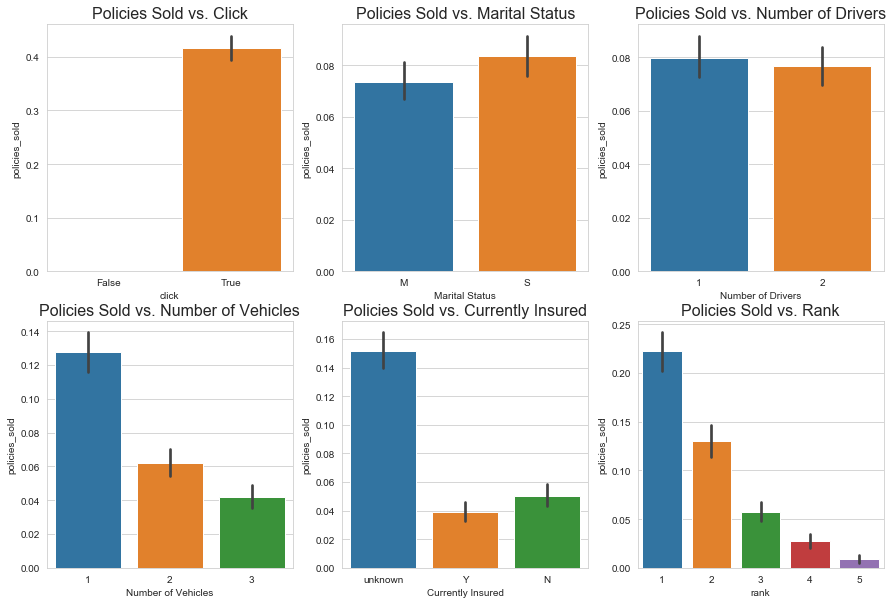

In [3]:
# Creating barplots

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

## Policies sold vs. Click
## Are those who click more likely to buy a policy?
sns.barplot(x="click", y="policies_sold", data=df, ax=axes[0][0])
axes[0][0].set_title("Policies Sold vs. Click", fontsize=16)

## Click vs. Marital Status
## Are those who are single more likely to click?
sns.barplot(x="Marital Status", y="policies_sold", data=df, ax=axes[0][1])
axes[0][1].set_title("Policies Sold vs. Marital Status", fontsize=16)

## Click vs. Number of Drivers
sns.barplot(x="Number of Drivers", y="policies_sold", data=df, ax=axes[0][2])
axes[0][2].set_title("Policies Sold vs. Number of Drivers", fontsize=16)

## Click vs. Number of Vehicles
sns.barplot(x="Number of Vehicles", y="policies_sold", data=df, ax=axes[1][0])
axes[1][0].set_title("Policies Sold vs. Number of Vehicles", fontsize=16)

## Click vs. Currently Insured
sns.barplot(x="Currently Insured", y="policies_sold", data=df, ax=axes[1][1])
axes[1][1].set_title("Policies Sold vs. Currently Insured", fontsize=16)

## Click vs. Rank
sns.barplot(x="rank", y="policies_sold", data=df, ax=axes[1][2])
axes[1][2].set_title("Policies Sold vs. Rank", fontsize=16)


### Relationship Between Variables / Statistics

### Classification - Logistic Regression

We want to create a model that can predict whether someone is likely to buy a policy or not.
Based on that model, the bidding will change (i.e., bid more for those more likely to buy a policy)

In [4]:
# Logistic Regression Model

## import the logistic regression method
from sklearn.linear_model import LogisticRegression
## import package to perform stratified test-train split
from sklearn.model_selection import train_test_split



In [5]:
# Creating dummy variables for the categorical data
# Note: ONLY RUN ONCE

df = pd.get_dummies(df, columns = ['Currently Insured','Number of Vehicles',
                                  'Number of Drivers','Marital Status',
                                  'rank'])
df

,bid,click,policies_sold,Currently Insured_N,Currently Insured_Y,Currently Insured_unknown,Number of Vehicles_1,Number of Vehicles_2,Number of Vehicles_3,Number of Drivers_1,Number of Drivers_2,Marital Status_M,Marital Status_S,rank_1,rank_2,rank_3,rank_4,rank_5
0,10.0,False,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0
1,10.0,False,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1
2,10.0,False,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1
3,10.0,False,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0
4,10.0,False,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10.0,True,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0
9996,10.0,False,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0
9997,10.0,False,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1
9998,10.0,False,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0


In [6]:
# Split train-test data
random_seed = 600

X = df[['Currently Insured_N','Currently Insured_Y','Currently Insured_unknown',
      'Number of Vehicles_1','Number of Vehicles_2','Number of Vehicles_3',
      'Number of Drivers_1','Number of Drivers_2',
      'Marital Status_M','Marital Status_S',
      'rank_1','rank_2','rank_3','rank_4','rank_5']]
y = df['policies_sold']
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    shuffle=True,
                                                    random_state=random_seed,
                                                    stratify=y)


In [7]:
# Fit the logistic regression model
clf = LogisticRegression(solver='lbfgs')

clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Evaluation
Let's see how well our model performed

In [8]:
# Import evaluation metrics from sklearn

from sklearn.metrics import classification_report

In [9]:
# Predicting number of policies sold and probability of policies sold
test_pred = clf.predict(X_test)
test_prob = clf.predict_proba(X_test)

# Classification Report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1843
           1       0.00      0.00      0.00       157

    accuracy                           0.92      2000
   macro avg       0.46      0.50      0.48      2000
weighted avg       0.85      0.92      0.88      2000



C:\Users\chend\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Interpretation
Which categorical variables are more important?


In [11]:
# Get coefficients of each feature
coefficients = np.hstack((clf.intercept_, clf.coef_[0]))
cat_cols = ['Currently Insured_N','Currently Insured_Y','Currently Insured_unknown',
      'Number of Vehicles_1','Number of Vehicles_2','Number of Vehicles_3',
      'Number of Drivers_1','Number of Drivers_2',
      'Marital Status_M','Marital Status_S',
      'rank_1','rank_2','rank_3','rank_4','rank_5']

# Create a dataframe of each feature's coefficient
df_coeff = pd.DataFrame(data={'variable': ['intercept'] + cat_cols, 'coefficient': coefficients})

# Rank the coefficients from highest to lowest
df_coeff.sort_values(by=['coefficient'], ascending = False)


,variable,coefficient
11,rank_1,1.457449
12,rank_2,0.771254
4,Number of Vehicles_1,0.224527
3,Currently Insured_unknown,0.145229
7,Number of Drivers_1,0.103333
1,Currently Insured_N,0.080591
10,Marital Status_S,0.065466
13,rank_3,0.005869
9,Marital Status_M,-0.065302
6,Number of Vehicles_3,-0.070307


### Cross Validation